# Polytopeライブラリ

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np

sys.path.append(os.path.join(os.getcwd(), 'my_lib'))

from func_plot import *
from func_polytope import *

## Polytopeオブジェクトの生成

chebyshev ball radius= 1.2032267182599272
               center= [ 1.59515 -1.70323]


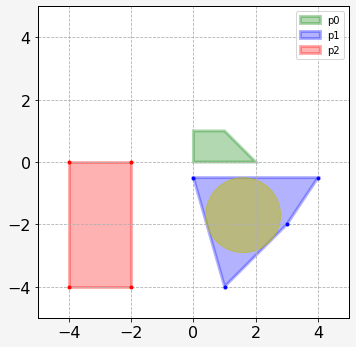

In [54]:
# H-representation
A  = np.array([[1.0, 1.0],
              [0.0, 1.0],
              [-1.0, 0.0],
              [0.0, -1.0]]);
b  = np.array([2.0, 1.0, 0.0, 0.0]);
p0 = polytope_h(A,b)

p1 = polytope_v(np.array([[0,-0.5],[4,-0.5],[3,-2],[1,-4]]))

# ボックスの座標から生成
lb = [-4, -4] # 左下座標[x, y]
rt = [-2, 0]  # 右下座標[x, y]
p2 = polytope_box(lb, rt)

# 描画
fig, ax = Fig(size=(5,5))
xlim(ax,[-5,5])
ylim(ax,[-5,5])

p0.plot(ax[0], alpha=0.3, color='g', edgecolor='g', linestyle='-')
p1.plot(ax[0], alpha=0.3, color='b', edgecolor='b', linestyle='-')
p2.plot(ax[0], alpha=0.3, color='r', edgecolor='r', linestyle='-')
ax[0].legend(labels=["p0","p1","p2","cheby"], fontsize=10)

# 頂点座標を抽出
v1 = extreme(p1)
v2 = extreme(p2)
ax[0].plot(v1[:,0],v1[:,1],color='b', linestyle='None', marker='.')
ax[0].plot(v2[:,0],v2[:,1],color='r', linestyle='None', marker='.')

# 内接円を描画(Chebyshev Ball)
r1  = p1.chebR
c1  = p1.chebXc
print('chebyshev ball radius=',r1)
print('               center=',c1)
draw_circle = plt.Circle(c1, r1, alpha=0.5, color='y',linestyle='-')
ax[0].add_artist(draw_circle)
ax[0].set_aspect(1);


## 射影（Project）

In [42]:
lb = [-4, -4, 0]  # 左下座標[x, y, z]
rt = [-2, 0 , 1]  # 右下座標[x, y, z]
p3 = polytope_box(lb,rt)
print("p3 =",p3)

# 射影する軸番号をリストで入力(1から始まる)
# サイズが大きくなると機能しなくなるので非推奨
p4 = p3.project([1,2]) 
print("proj_xy(p4) =",p4);

# my-lib
p5 = project(p3,[0,1])
print("proj_xy(p5) =",p5);

p3 = Single polytope 
  [[ 1.  0.  0.] |    [[-2.]
   [ 0.  1.  0.] |     [ 0.]
   [ 0.  0.  1.] x <=  [ 1.]
   [-1. -0. -0.] |     [ 4.]
   [-0. -1. -0.] |     [ 4.]
   [-0. -0. -1.]]|     [ 0.]]

proj_xy(p4) = Single polytope 
  [[ 1.  0.] |    [[-2.]
   [ 0.  1.] x <=  [ 0.]
   [-1.  0.] |     [ 4.]
   [ 0. -1.]]|     [ 4.]]

proj_xy(p5) = Single polytope 
  [[ 0.  1.] |    [[ 0.]
   [-1.  0.] x <=  [ 4.]
   [ 1.  0.] |     [-2.]
   [ 0. -1.]]|     [ 4.]]



## 集合差（Diff）
 集合差演算は凸集合同士でも凸とならない場合が有り、その時は複数の集合組で構成される

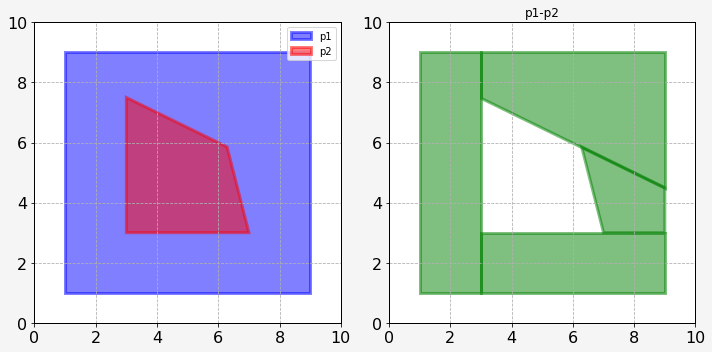

In [43]:
lb = [1,1]
rt = [9,9]
p1 = polytope_box(lb,rt)

A  = np.array([[-1.0, 0.0],
              [0.0, -1.0],
              [1.0, 2.0],
              [4.0, 1.0]]);
b  = np.array([-3.0, -3.0, 18.0, 31.0]);
p2 = polytope_h(A,b)

# p1-p2
p3 = diff(p1,p2) # my-lib

# 描画
fig, ax = Fig(size=(10,5),col=2)
p1.plot(ax[0], alpha=0.5, color='b', edgecolor='b', linestyle='-')
p2.plot(ax[0], alpha=0.5, color='r', edgecolor='r', linestyle='-')
ax[0].legend(labels=["p1","p2"], fontsize=10)
p3.plot(ax[1], alpha=0.5, color='g', edgecolor='g', linestyle='-')
ax[1].set_title("p1-p2")
xlim(ax, [0,10])
ylim(ax, [0,10])

## 集合和（Union）
　集合和演算は凸集合同士でも凸とならない場合が有り、その時は複数の集合組で構成される

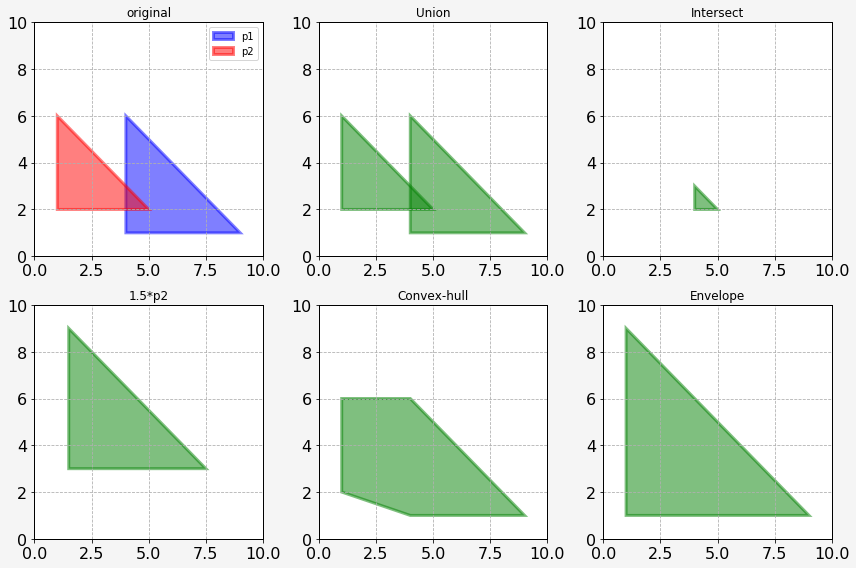

In [44]:
A  = np.array([[-1.0, 0.0],
              [0.0, -1.0],
              [1.0, 1.0]])
b  = np.array([-4.0, -1.0, 10.0]);
p1 = polytope_h(A,b)

A  = np.array([[-1.0, 0.0],
              [0.0, -1.0],
              [1.0, 1.0]])
b  = np.array([-1.0, -2.0, 7.0]);
p2 = polytope_h(A,b)

p3 = union(p1,p2)
p4 = intersect(p1,p2)
p5 = hull(p1,p2)
p6 = envelope(p1,p2)
p7 = mul(p2,1.5)

# 描画
fig, ax = Fig(size=(12,8),row=2, col=3)
xlim(ax,[0,10])
ylim(ax,[0,10])
title(ax,"original","Union","Intersect","1.5*p2","Convex-hull","Envelope")

p1.plot(ax[0][0], alpha=0.5, color='b', edgecolor='b', linestyle='-')
p2.plot(ax[0][0], alpha=0.5, color='r', edgecolor='r', linestyle='-')
ax[0][0].legend(labels=["p1","p2"], fontsize=10)
p3.plot(ax[0][1], alpha=0.5, color='g', edgecolor='g', linestyle='-')
p4.plot(ax[0][2], alpha=0.5, color='g', edgecolor='g', linestyle='-')
p5.plot(ax[1][1], alpha=0.5, color='g', edgecolor='g', linestyle='-')
p6.plot(ax[1][2], alpha=0.5, color='g', edgecolor='g', linestyle='-')
p7.plot(ax[1][0], alpha=0.5, color='g', edgecolor='g', linestyle='-');

## Minkowski Sum

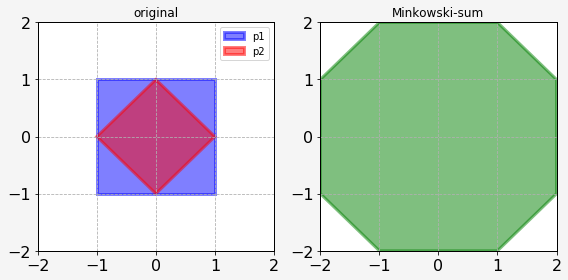

In [45]:
lb = [-1,-1]
rt = [1,1]
p1 = polytope_box(lb,rt)

A  = np.array([[1.0, -1.0],
              [-1.0, -1.0],
              [1.0, 1.0],
              [-1.0, 1.0]])
b  = np.array([1.0, 1.0, 1.0, 1.0]);
p2 = polytope_h(A,b)

p3 = plus(p1, p2) # Minkowski-sum

# 描画
fig, ax = Fig(size=(8,4),col=2)
xlim(ax,[-2,2])
ylim(ax,[-2,2])
title(ax,'original','Minkowski-sum')

p1.plot(ax[0], alpha=0.5, color='b', edgecolor='b', linestyle='-')
p2.plot(ax[0], alpha=0.5, color='r', edgecolor='r', linestyle='-')
ax[0].legend(labels=["p1","p2"], fontsize=10)
p3.plot(ax[1], alpha=0.5, color='g', edgecolor='g', linestyle='-');

## Pontryagin diff

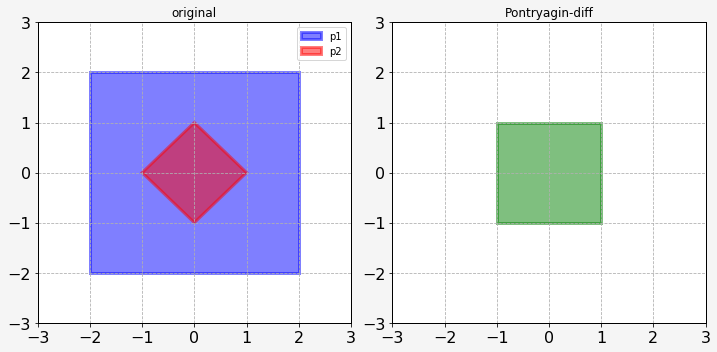

In [48]:
lb = [-2,-2]
rt = [2,2]
p1 = polytope_box(lb,rt)

A  = np.array([[1.0, -1.0],
              [-1.0, -1.0],
              [1.0, 1.0],
              [-1.0, 1.0]])
b  = np.array([1.0, 1.0, 1.0, 1.0]);
p2 = polytope_h(A,b)

p3 = minus(p1, p2) # my-lib

# 描画
fig, ax = Fig(size=(10,5),col=2)
xlim(ax,[-3,3])
ylim(ax,[-3,3])
title(ax,'original','Pontryagin-diff')
p1.plot(ax[0], alpha=0.5, color='b', edgecolor='b', linestyle='-')
p2.plot(ax[0], alpha=0.5, color='r', edgecolor='r', linestyle='-')
ax[0].legend(labels=["p1","p2"], fontsize=10)
p3.plot(ax[1], alpha=0.5, color='g', edgecolor='g', linestyle='-');

In [754]:
import inspect
from IPython.display import display
import pandas as pd

mem_list = pd.DataFrame(inspect.getmembers(p1))
display(mem_list)

,0,1
0,A,"[[1.0, 0.0], [0.0, 1.0], [-1.0, -0.0], [-0.0, ..."
1,__bool__,<bound method Polytope.__bool__ of <polytope.p...
2,__class__,<class 'polytope.polytope.Polytope'>
3,__contains__,<bound method Polytope.__contains__ of <polyto...
4,__copy__,<bound method Polytope.__copy__ of <polytope.p...
5,__delattr__,<method-wrapper '__delattr__' of Polytope obje...
6,__dict__,"{'A': [[1.0, 0.0], [0.0, 1.0], [-1.0, -0.0], [..."
7,__dir__,<built-in method __dir__ of Polytope object at...
8,__doc__,Polytope class with following fields\n\n ...
9,__eq__,<bound method Polytope.__eq__ of <polytope.pol...
